In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 

import statsmodels.tsa.api as tsa
import itertools

from sklearn.model_selection import train_test_split
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10

mpl.rc('font',family= 'Malgun Gothic')

In [6]:
short_df = pd.read_csv('datasets/month_short_term_frgn.csv')
short_df

,m,nationality,count_num,emd_cd,emd_nm,visit_pop_cnt
0,2018-01,CHN,744,50110590,건입동,30589.4398
1,2018-01,CHN,744,50110256,구좌읍,26691.1513
2,2018-01,CHN,744,50130253,남원읍,179846.0273
3,2018-01,CHN,744,50110660,노형동,145583.1902
4,2018-01,CHN,742,50130590,대륜동,22743.8459
...,...,...,...,...,...,...
16250,2021-06,VNM,126,50110320,추자면,36.6789
16251,2021-06,VNM,39,50130320,표선면,9.2223
16252,2021-06,VNM,45,50110310,한경면,11.1088
16253,2021-06,VNM,37,50110250,한림읍,7.7552


In [7]:
short_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16255 entries, 0 to 16254
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   m              16255 non-null  object 
 1   nationality    16255 non-null  object 
 2   count_num      16255 non-null  int64  
 3   emd_cd         16255 non-null  int64  
 4   emd_nm         16255 non-null  object 
 5   visit_pop_cnt  16255 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 762.1+ KB


In [19]:
short_df['m'] = pd.to_datetime(short_df['m'])
short_df = short_df.drop(columns='emd_cd')
short_df

,m,nationality,count_num,emd_nm,visit_pop_cnt
0,2018-01-01,CHN,744,건입동,30589.4398
1,2018-01-01,CHN,744,구좌읍,26691.1513
2,2018-01-01,CHN,744,남원읍,179846.0273
3,2018-01-01,CHN,744,노형동,145583.1902
4,2018-01-01,CHN,742,대륜동,22743.8459
...,...,...,...,...,...
16250,2021-06-01,VNM,126,추자면,36.6789
16251,2021-06-01,VNM,39,표선면,9.2223
16252,2021-06-01,VNM,45,한경면,11.1088
16253,2021-06-01,VNM,37,한림읍,7.7552


In [20]:
short_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16255 entries, 0 to 16254
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   m              16255 non-null  datetime64[ns]
 1   nationality    16255 non-null  object        
 2   count_num      16255 non-null  int64         
 3   emd_nm         16255 non-null  object        
 4   visit_pop_cnt  16255 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 635.1+ KB


In [21]:
short_df['nationality'].unique()

array(['CHN', 'ETC', 'HKG', 'IDN', 'JPN', 'MYS', 'SGP', 'THA', 'USA',
       'VNM'], dtype=object)

In [22]:
short_df['emd_nm'].unique()
#43

array(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동',
       '봉개동', '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면',
       '애월읍', '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '우도면',
       '이도1동', '이도2동', '이호동', '일도1동', '일도2동', '정방동', '조천읍', '중문동', '중앙동',
       '천지동', '추자면', '표선면', '한경면', '한림읍', '화북동', '효돈동'], dtype=object)

In [23]:
short_df.sort_values(by=['m','emd_nm'])

,m,nationality,count_num,emd_nm,visit_pop_cnt
0,2018-01-01,CHN,744,건입동,30589.4398
43,2018-01-01,ETC,627,건입동,6180.7434
86,2018-01-01,HKG,383,건입동,3338.7747
128,2018-01-01,IDN,213,건입동,5750.0000
168,2018-01-01,JPN,533,건입동,7711.5516
...,...,...,...,...,...
16064,2021-06-01,IDN,7,효돈동,1.1669
16118,2021-06-01,MYS,2,효돈동,0.9326
16181,2021-06-01,THA,102,효돈동,2.5344
16223,2021-06-01,USA,7,효돈동,6.4484


In [36]:
## 새로운 테이블 생성

# 국적별 평균 리스트
na_mean_list = list(short_df['nationality'].unique()+'mean')

# 국적별 합 리스트
na_sum_list = list(short_df['nationality'].unique()+'sum')

# 동 리스트
region_list = list(short_df['emd_nm'].unique())


# 2018-01-01 ~ 2021-06-01 (주기: 월) 날짜에 동별 정보를 담은 dataframe
dt_index = pd.date_range(start='20180101', end='20210601',freq='MS')
val1 = list(dt_index)*len(region_list)
val2 = []
for i in region_list:
    for j in range(0,len(dt_index)):
        val2.append(i)
        
date_df = pd.DataFrame({'Year_Month':val1, 'emd_nm':val2})

In [37]:
val1

[Timestamp('2018-01-01 00:00:00', freq='MS'),
 Timestamp('2018-02-01 00:00:00', freq='MS'),
 Timestamp('2018-03-01 00:00:00', freq='MS'),
 Timestamp('2018-04-01 00:00:00', freq='MS'),
 Timestamp('2018-05-01 00:00:00', freq='MS'),
 Timestamp('2018-06-01 00:00:00', freq='MS'),
 Timestamp('2018-07-01 00:00:00', freq='MS'),
 Timestamp('2018-08-01 00:00:00', freq='MS'),
 Timestamp('2018-09-01 00:00:00', freq='MS'),
 Timestamp('2018-10-01 00:00:00', freq='MS'),
 Timestamp('2018-11-01 00:00:00', freq='MS'),
 Timestamp('2018-12-01 00:00:00', freq='MS'),
 Timestamp('2019-01-01 00:00:00', freq='MS'),
 Timestamp('2019-02-01 00:00:00', freq='MS'),
 Timestamp('2019-03-01 00:00:00', freq='MS'),
 Timestamp('2019-04-01 00:00:00', freq='MS'),
 Timestamp('2019-05-01 00:00:00', freq='MS'),
 Timestamp('2019-06-01 00:00:00', freq='MS'),
 Timestamp('2019-07-01 00:00:00', freq='MS'),
 Timestamp('2019-08-01 00:00:00', freq='MS'),
 Timestamp('2019-09-01 00:00:00', freq='MS'),
 Timestamp('2019-10-01 00:00:00', 

In [38]:
# 값 채우기

mean_list = list(np.array(short_df['visit_pop_cnt']/short_df['count_num'].tolist())) 
sum_list = list(np.array(short_df['visit_pop_cnt'].tolist())) 
cat_array = np.zeros(shape=(len(date_df),len(na_list))) #조건에 맞는 평균값을 저장할 배열


for i in range(0,len(date_df)):
    date = date_df["Year_Month"][i]
    emd = date_df['emd_nm'][i]
    for j in range(0,len(na_list)):
        sample_list = short_df[(short_df['m']==date)
                      &(short_df['emd_nm'] == emd)
                      &(short_df['nationality']==na_list[j])].index.tolist()
        if sample_list == []:
            cat_array[i,j] = np.NaN
        else:
            cat_array[i,j] = median_list[sample_list[0]]

KeyboardInterrupt: 

In [30]:
# 위에서 만든 array 배열을 데이터 프레임에 저장
cat_df = pd.DataFrame(cat_array, columns = na_list)

In [31]:
# date_df, cat_df 병합
df_new = pd.concat([date_df, cat_df], axis=1)

In [33]:
df_new
# 소수점을 떼어버리고 계산시작한 값이 나옴

,Year_Month,emd_nm,CHN,ETC,HKG,IDN,JPN,MYS,SGP,THA,USA,VNM
0,2018-01-01,건입동,41.114838,9.857645,8.717427,26.995305,14.468202,16.168008,10.356977,17.371622,3.448075,31.299017
1,2018-02-01,건입동,65.696170,12.231400,10.546545,15.265548,10.892562,21.524557,5.634305,10.241607,3.598657,14.734729
2,2018-03-01,건입동,55.386503,30.681319,11.772991,13.263995,14.367325,16.649967,6.020295,23.720066,11.389660,25.157503
3,2018-04-01,건입동,76.862077,28.602001,26.683275,14.032760,16.233383,26.422153,6.105965,21.407889,7.068415,23.716535
4,2018-05-01,건입동,79.669781,19.027283,24.456911,17.874271,24.694549,26.784589,8.898141,19.275370,3.674263,16.613573
...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2021-02-01,효돈동,0.113700,NaN,0.028500,NaN,0.666700,NaN,NaN,0.011669,NaN,NaN
1802,2021-03-01,효돈동,0.144700,0.488400,NaN,0.162900,NaN,NaN,NaN,0.008523,1.253300,NaN
1803,2021-04-01,효돈동,0.162794,0.516571,NaN,NaN,NaN,NaN,NaN,0.008000,1.253300,NaN
1804,2021-05-01,효돈동,0.822408,1.635541,0.034558,0.162900,NaN,NaN,NaN,0.010167,1.253300,0.196900


In [34]:
df_new[df_new["emd_nm"]=="건입동"]

,Year_Month,emd_nm,CHN,ETC,HKG,IDN,JPN,MYS,SGP,THA,USA,VNM
0,2018-01-01,건입동,41.114838,9.857645,8.717427,26.995305,14.468202,16.168008,10.356977,17.371622,3.448075,31.299017
1,2018-02-01,건입동,65.696170,12.231400,10.546545,15.265548,10.892562,21.524557,5.634305,10.241607,3.598657,14.734729
2,2018-03-01,건입동,55.386503,30.681319,11.772991,13.263995,14.367325,16.649967,6.020295,23.720066,11.389660,25.157503
3,2018-04-01,건입동,76.862077,28.602001,26.683275,14.032760,16.233383,26.422153,6.105965,21.407889,7.068415,23.716535
4,2018-05-01,건입동,79.669781,19.027283,24.456911,17.874271,24.694549,26.784589,8.898141,19.275370,3.674263,16.613573
5,2018-06-01,건입동,76.819505,28.128044,43.376770,13.735604,36.745298,31.852402,20.382803,17.132223,5.800239,30.902131
6,2018-07-01,건입동,93.208588,23.708396,16.995979,17.771152,17.577781,17.693329,6.918701,4.555909,5.147498,33.308926
7,2018-08-01,건입동,139.973754,30.869647,18.625331,20.890558,26.092403,26.544685,7.255254,2.765655,4.676143,41.974027
8,2018-09-01,건입동,146.602066,40.569726,20.883341,12.419409,31.677009,33.335154,8.450757,8.107608,13.356088,18.456030
9,2018-10-01,건입동,195.274795,51.615647,16.145342,8.396129,39.290071,17.639057,12.353108,7.914562,11.886977,10.020687


In [ ]:
# 여기까지 윤서가 올려준 대로 따라한거,, 합, 평균 같이 나오게 하려다가 중단,,

In [25]:
y = data['visit_pop_cnt'].resample('1M').mean()

In [26]:
y.isnull().sum()

0

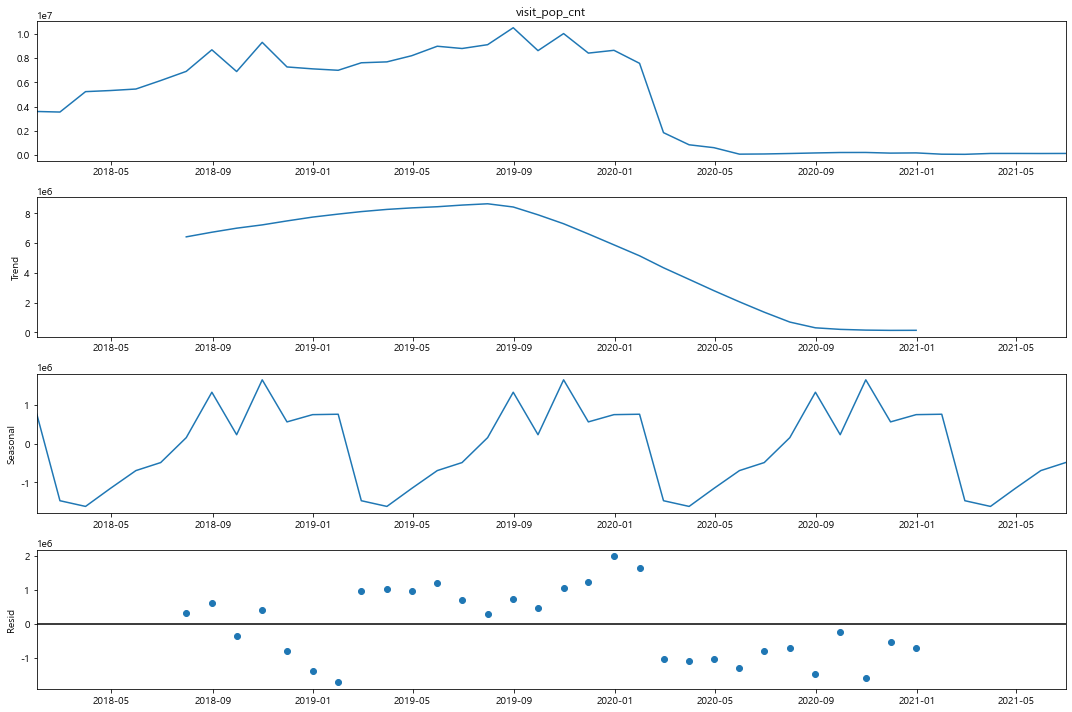

In [27]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y, model='additive')

# 모델 시각화
fig = model_series.plot()
plt.show()

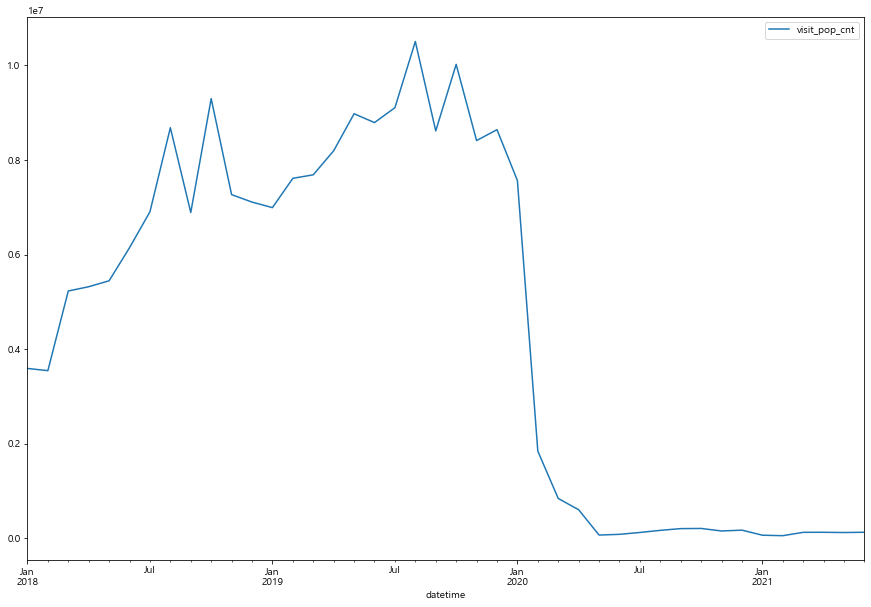

In [31]:
fig = data.plot()